## Naukri Job Market Analysis

In [2487]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [2488]:
data = pd.read_csv('final_data.csv')
data.head()

,Unnamed: 0,Company,Experience,Job_Post_History,Location,Ratings,Reviews,Salary,Skills,Title,URL
0,0,Accenture,5-8 Yrs,1 Day Ago,Mumbai,4.2,(30336 Reviews),Not disclosed,Due diligence,Senior Analyst-Finance Processes and Operations,https://www.naukri.com/job-listings-senior-ana...
1,1,Accenture,5-8 Yrs,1 Day Ago,Mumbai,4.2,(30336 Reviews),Not disclosed,Due diligence,Senior Analyst-Finance Processes and Operations,https://www.naukri.com/job-listings-senior-ana...
2,2,Accenture,5-8 Yrs,1 Day Ago,Mumbai,4.2,(30336 Reviews),Not disclosed,Due diligence,Senior Analyst-Finance Processes and Operations,https://www.naukri.com/job-listings-senior-ana...
3,3,Accenture,5-8 Yrs,1 Day Ago,Mumbai,4.2,(30336 Reviews),Not disclosed,Due diligence,Senior Analyst-Finance Processes and Operations,https://www.naukri.com/job-listings-senior-ana...
4,4,Accenture,5-8 Yrs,1 Day Ago,Mumbai,4.2,(30336 Reviews),Not disclosed,Due diligence,Senior Analyst-Finance Processes and Operations,https://www.naukri.com/job-listings-senior-ana...


In [2489]:
data.shape

(560, 11)

In [2490]:
data.columns

Index(['Unnamed: 0', 'Company', 'Experience', 'Job_Post_History', 'Location',
       'Ratings', 'Reviews', 'Salary', 'Skills', 'Title', 'URL'],
      dtype='object')

In [2491]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        560 non-null    int64  
 1   Company           560 non-null    object 
 2   Experience        560 non-null    object 
 3   Job_Post_History  560 non-null    object 
 4   Location          560 non-null    object 
 5   Ratings           560 non-null    float64
 6   Reviews           560 non-null    object 
 7   Salary            560 non-null    object 
 8   Skills            560 non-null    object 
 9   Title             560 non-null    object 
 10  URL               560 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 48.3+ KB


## Dataset Overview
--------------------------
#### Rows: 560 job listings

#### Columns: 11

#### Key Columns:

#### Company, Experience, Location, Ratings, Salary, Skills, Title

## Exploratory Data Analysis (EDA) Process

In [2494]:
#  Check for Missing Values

data.isnull().sum()

Unnamed: 0          0
Company             0
Experience          0
Job_Post_History    0
Location            0
Ratings             0
Reviews             0
Salary              0
Skills              0
Title               0
URL                 0
dtype: int64

In [2495]:
data.describe(include='object')

,Company,Experience,Job_Post_History,Location,Reviews,Salary,Skills,Title,URL
count,560,560,560,560,560,560,560,560,560
unique,28,20,10,11,26,9,34,30,43
top,Accenture,3-5 Yrs,1 Day Ago,Pune,(30336 Reviews),Not disclosed,Financial analysis,Analyst-Finance Processes,https://www.naukri.com/job-listings-oracle-fus...
freq,160,90,170,150,160,480,50,60,40


In [2496]:
# Remove unnecessary columns (Unnamed: 0, URLs)

data.drop(columns=['Unnamed: 0'], inplace=True)

In [2497]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True)

In [2498]:
data.shape

(45, 10)

In [2499]:
data.head()

,Company,Experience,Job_Post_History,Location,Ratings,Reviews,Salary,Skills,Title,URL
0,Accenture,5-8 Yrs,1 Day Ago,Mumbai,4.2,(30336 Reviews),Not disclosed,Due diligence,Senior Analyst-Finance Processes and Operations,https://www.naukri.com/job-listings-senior-ana...
1,CoinDCX,1-3 Yrs,1 Day Ago,Mumbai,4.7,(14 Reviews),Not disclosed,Analyst,Business Analyst - Finance,https://www.naukri.com/job-listings-business-a...
2,Oracle,5-10 Yrs,1 Day Ago,"Mumbai (All Areas), Hyderabad/Secunderabad, Pu...",3.9,(3683 Reviews),Not disclosed,Oracle Fusion Finance,Oracle Fusion Finance Analyst,https://www.naukri.com/job-listings-oracle-fus...
3,Siemens,0-5 Yrs,5 Days Ago,"Mumbai, Gurgaon/Gurugram, Aurangabad, Vadodara",4.2,(4657 Reviews),Not disclosed,Analytical skills,Finance Analyst,https://www.naukri.com/job-listings-finance-an...
4,Rave Technologies,4-6 Yrs,1 Day Ago,Mumbai,3.7,(105 Reviews),Not disclosed,Associate Financial Analyst,Sr. Associate - Financial Analyst,https://www.naukri.com/job-listings-sr-associa...


In [2500]:
# Categorical features analysis
data['Company'].value_counts().head()
data['Experience'].value_counts().head()
data['Location'].value_counts().head()
data['Skills'].value_counts().head()
data['Title'].value_counts().head()


Title
Analyst-Finance Processes                          5
Senior Analyst-Finance Processes and Operations    3
Senior Analyst-Finance Processes                   3
Oracle Fusion Finance Analyst                      3
Finance Analyst                                    3
Name: count, dtype: int64

In [2501]:
# Numerical feature (Ratings) analysis
data['Ratings'].describe()

count    45.000000
mean      4.055556
std       0.472207
min       1.600000
25%       4.000000
50%       4.200000
75%       4.200000
max       4.700000
Name: Ratings, dtype: float64

In [2502]:
data['Salary'].unique()

array(['Not disclosed', '4,00,000 - 9,00,000 PA.',
       '11,00,000 - 20,00,000 PA.', '5,00,000 - 12,00,000 PA.',
       '4,00,000 - 6,00,000 PA.', '8,00,000 - 13,00,000 PA.',
       '4,50,000 - 7,00,000 PA.', '5,00,000 - 14,00,000 PA.',
       '7,00,000 - 15,00,000 PA.'], dtype=object)

In [2503]:
# Define standard city mapping
city_map = {
    'pune': 'Pune',
    'mumbai': 'Mumbai',
    'mumbai (all areas)': 'Mumbai',
    'chennai': 'Chennai',
    'kodambakkam': 'Chennai',
    'teynampet': 'Chennai',
    'ekkaduthangal': 'Chennai'
}

# Function to clean and extract primary city
def clean_location(loc):
    if pd.isna(loc):
        return 'Unknown'
    
    # Convert to lowercase for mapping
    loc = loc.lower()

    # Remove text in parentheses like (All Areas), (Teynampet), etc.
    loc = re.sub(r'\([^)]*\)', '', loc)

    # Split by comma and slash
    parts = re.split(r'[,/]', loc)
    for part in parts:
        city = part.strip()
        if city in city_map:
            return city_map[city]
    return parts[0].strip().title()  # fallback to first part

# Apply to DataFrame
data['Location'] = data['Location'].apply(clean_location)



In [2504]:
data['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai'], dtype=object)

In [2505]:
# Replace "Not disclosed" with NaN
data['Salary'] = data['Salary'].replace('Not disclosed', np.nan)

In [2506]:
# Function to clean and convert salary ranges to numeric average
def convert_salary_range(salary):
    if isinstance(salary, str) and '-' in salary:
        # Remove "PA." and commas
        salary_range = salary.replace(' PA.', '').replace(',', '').split(' - ')
        
        # Check if the salary range is valid (contains two values)
        if len(salary_range) == 2:
            min_salary = float(salary_range[0])
            max_salary = float(salary_range[1])
            return (min_salary + max_salary) / 2  # Take average of the range
    
    return salary  # If already a valid numeric value, return as is

# Apply the function to clean the salary column
data['Salary'] = data['Salary'].apply(convert_salary_range)


In [2507]:
# Verify the changes
print(data['Salary'].head())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Salary, dtype: float64


In [2508]:
data['Salary'].unique()


array([     nan,  650000., 1550000.,  850000.,  500000., 1050000.,
        575000.,  950000., 1100000.])

In [2509]:
data['Salary'] = data['Salary'].fillna(data['Salary'].median())

In [2510]:
def categorize_salary(salary):
    if 1100000 <= salary <= 2000000:
        return 'High'
    elif 700000 <= salary < 1200000:
        return 'Medium'
    elif 450000 <= salary < 700000:
        return 'Low'
    else:
        return 'Other'  # For any salaries outside the specified ranges, if needed

data['Salary'] = data['Salary'].apply(categorize_salary)

# Check the distribution of salary categories
print(data['Salary'].value_counts())


Salary
Medium    40
Low        3
High       2
Name: count, dtype: int64


In [2511]:
#Identify and separate categorical and numerical columns
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Title', 'Standardized_Title']
Numerical Columns: []


In [2512]:
data.head()

,Company,Experience,Job_Post_History,Location,Ratings,Reviews,Salary,Skills,Title,URL
0,Accenture,5-8 Yrs,1 Day Ago,Mumbai,4.2,(30336 Reviews),Medium,Due diligence,Senior Analyst-Finance Processes and Operations,https://www.naukri.com/job-listings-senior-ana...
1,CoinDCX,1-3 Yrs,1 Day Ago,Mumbai,4.7,(14 Reviews),Medium,Analyst,Business Analyst - Finance,https://www.naukri.com/job-listings-business-a...
2,Oracle,5-10 Yrs,1 Day Ago,Mumbai,3.9,(3683 Reviews),Medium,Oracle Fusion Finance,Oracle Fusion Finance Analyst,https://www.naukri.com/job-listings-oracle-fus...
3,Siemens,0-5 Yrs,5 Days Ago,Mumbai,4.2,(4657 Reviews),Medium,Analytical skills,Finance Analyst,https://www.naukri.com/job-listings-finance-an...
4,Rave Technologies,4-6 Yrs,1 Day Ago,Mumbai,3.7,(105 Reviews),Medium,Associate Financial Analyst,Sr. Associate - Financial Analyst,https://www.naukri.com/job-listings-sr-associa...


In [2513]:

df = pd.DataFrame({
    'Title': [
        'Senior Analyst-Finance Processes and Operations', 'Business Analyst - Finance',
        'Oracle Fusion Finance Analyst', 'Finance Analyst', 'Sr. Associate - Financial Analyst',
        'Analyst-Finance Processes', 'Manager/ Analyst- Business Finance & M&A',
        'Finance Reporting Analyst', 'SAP FI CO Finance Business Analyst', 'Finance Analyst',
        'Analyst I, Global Financial Data Operations',
        'Lead/Senior Analyst Structured finance - 2 To 10 years BNY Mellon Pune',
        'Senior Analyst-Finance Processes', 'Analyst-Finance Processes and Operations',
        'Business Analyst /Peoplesoft / finance modules / General ledger', 'Senior Financial Analyst',
        'Financial Planning Analyst', 'Financial Analyst', 'Oracle Financial Analyst',
        'Lead Analyst, Financial Planning & Analysis',
        'Senior Financial Associate/Financial Analyst/Senior Financial Analyst',
        'Consultant / Analyst - Finance', 'R&A Int. Lubes Finance Analyst - OM/EG',
        'Financial Analyst II @ ICON | Spot Offer', 'Financial / Research Analyst - Corporate Development',
        'Financial Analyst', 'R&A Int. Lubes Finance Analyst - IT',
        'Immediate Hiring For Financial Analyst', 'Financial Crime Operations Analyst',
        'RA Marine Finance Analyst'
    ]
})

# Title mapping
title_map = {
    'Senior Analyst-Finance Processes and Operations': 'Senior Analyst',
    'Senior Analyst-Finance Processes': 'Senior Analyst',
    'Senior Financial Analyst': 'Senior Analyst',
    'Senior Financial Associate/Financial Analyst/Senior Financial Analyst': 'Senior Analyst',
    'Lead/Senior Analyst Structured finance - 2 To 10 years BNY Mellon Pune': 'Senior Analyst',

    'Business Analyst - Finance': 'Business Analyst',
    'Manager/ Analyst- Business Finance & M&A': 'Business Analyst',
    'SAP FI CO Finance Business Analyst': 'Business Analyst',
    'Business Analyst /Peoplesoft / finance modules / General ledger': 'Business Analyst',

    'Oracle Fusion Finance Analyst': 'Finance Analyst',
    'Finance Analyst': 'Finance Analyst',
    'R&A Int. Lubes Finance Analyst - OM/EG': 'Finance Analyst',
    'R&A Int. Lubes Finance Analyst - IT': 'Finance Analyst',
    'RA Marine Finance Analyst': 'Finance Analyst',
    'Finance Analyst\n': 'Finance Analyst',
    'Sr. Associate - Financial Analyst': 'Finance Analyst',
    'Financial Planning Analyst': 'Finance Analyst',
    'Oracle Financial Analyst': 'Finance Analyst',
    'Lead Analyst, Financial Planning & Analysis': 'Finance Analyst',
    'Financial Analyst II @ ICON | Spot Offer': 'Finance Analyst',
    'Financial Crime Operations Analyst': 'Finance Analyst',
    'Immediate Hiring For Financial Analyst': 'Finance Analyst',

    'Analyst-Finance Processes': 'Research Analyst',
    'Finance Reporting Analyst': 'Research Analyst',
    'Analyst I, Global Financial Data Operations': 'Research Analyst',
    'Analyst-Finance Processes and Operations': 'Research Analyst',
    'Financial / Research Analyst - Corporate Development': 'Research Analyst',

    'Consultant / Analyst - Finance': 'Finance'
}

# Cleaning and mapping function
def clean_title(title):
    if pd.isna(title):
        return 'Unknown'
    
    title = title.strip()  # Remove leading/trailing spaces
    title = re.sub(r'\([^)]*\)', '', title)  # Remove anything inside parentheses
    
    # Direct mapping
    if title in title_map:
        return title_map[title]
    
    # Lowercase loose matching
    title_lower = title.lower()
    for key in title_map.keys():
        if key.lower() in title_lower:
            return title_map[key]
    
    return 'Others'

# Step 2: Apply cleaning
df['Standardized_Title'] = df['Title'].apply(clean_title)


In [2514]:
data['Title'] = df['Standardized_Title']

In [2515]:
data['Title'].unique()

array(['Senior Analyst', 'Business Analyst', 'Finance Analyst',
       'Research Analyst', 'Others', 'Finance', nan], dtype=object)

In [2516]:
data.head()

,Company,Experience,Job_Post_History,Location,Ratings,Reviews,Salary,Skills,Title,URL
0,Accenture,5-8 Yrs,1 Day Ago,Mumbai,4.2,(30336 Reviews),Medium,Due diligence,Senior Analyst,https://www.naukri.com/job-listings-senior-ana...
1,CoinDCX,1-3 Yrs,1 Day Ago,Mumbai,4.7,(14 Reviews),Medium,Analyst,Business Analyst,https://www.naukri.com/job-listings-business-a...
2,Oracle,5-10 Yrs,1 Day Ago,Mumbai,3.9,(3683 Reviews),Medium,Oracle Fusion Finance,Finance Analyst,https://www.naukri.com/job-listings-oracle-fus...
3,Siemens,0-5 Yrs,5 Days Ago,Mumbai,4.2,(4657 Reviews),Medium,Analytical skills,Finance Analyst,https://www.naukri.com/job-listings-finance-an...
4,Rave Technologies,4-6 Yrs,1 Day Ago,Mumbai,3.7,(105 Reviews),Medium,Associate Financial Analyst,Finance Analyst,https://www.naukri.com/job-listings-sr-associa...


In [2517]:
df1 = pd.DataFrame({
    'Skills': ['Due diligence', 'Analyst', 'Oracle Fusion Finance',
       'Analytical skills', 'Associate Financial Analyst',
       'Financial analysis', 'financial forecasting',
       'financial reporting', 'Team management', 'finance',
       'financial data analysis', 'Structured Finance', 'Automation',
       'general ledger', 'Financial Analysis', 'Financial statements',
       'Microstrategy', 'financial analysis', 'R12', 'Post production',
       'Dynamics 365', 'Financial reporting', 'Finance',
       'investment banking', 'ERP', 'Analysis', 'Financial planning',
       'equity research', 'Assurance', 'data analyses',
       'Power Bi Reports', 'Financial Analyst', 'KYC',
       'business analysis']
})

In [2518]:
def clean_skills(skills):
    if pd.isna(skills):
        return []
    
    # Lowercase
    skills = skills.lower()
    
    # Remove unwanted characters
    skills = re.sub(r'[\n\t]', ',', skills)  # Replace \n and \t with comma
    skills = re.sub(r'\s*/\s*', ',', skills)  # Replace / with comma
    skills = re.sub(r'\s*\|\s*', ',', skills)  # Replace | with comma
    
    # Split based on comma
    skills_list = [skill.strip() for skill in skills.split(',') if skill.strip()]
    
    # Remove duplicates
    skills_list = list(set(skills_list))
    
    return skills_list

# Apply the function
df1['Cleaned_Skills'] = df1['Skills'].apply(clean_skills)

In [2519]:
data['Skills'] = df1['Cleaned_Skills']

In [2520]:
# Keep only first 30 rows
data = data.iloc[:30].reset_index(drop=True)

## Data Visualization

### Univariate Analysis

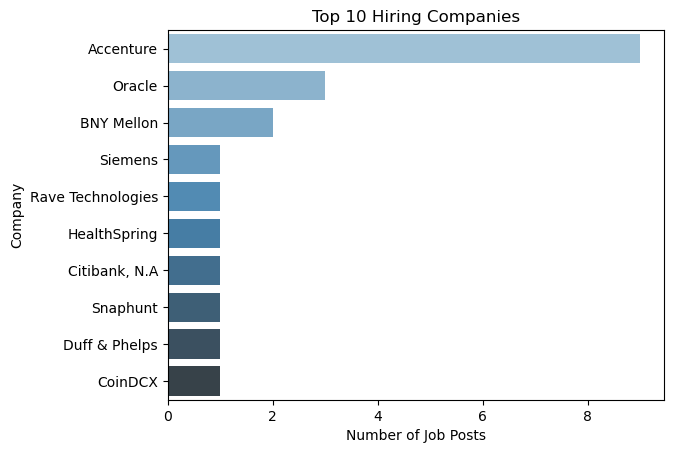

In [2523]:
# Top 10 Hiring Companies

top_companies = data['Company'].value_counts().head(10)
sns.barplot(x=top_companies.values, y=top_companies.index, palette='Blues_d')
plt.title("Top 10 Hiring Companies")
plt.xlabel("Number of Job Posts")
plt.ylabel("Company")
plt.show()

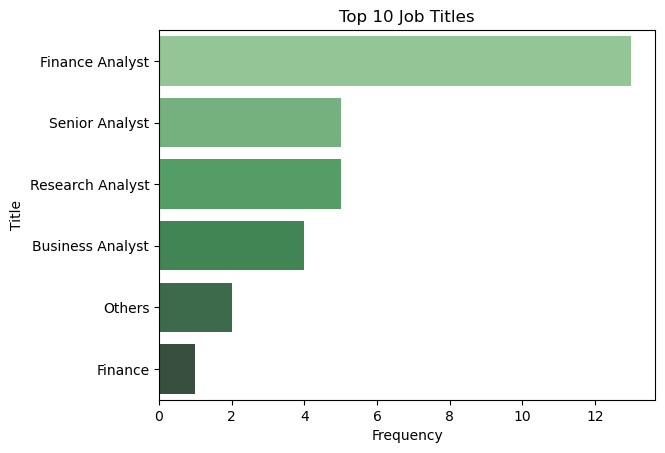

In [2524]:
# Most Common Job Titles

top_titles = data['Title'].value_counts().head(10)
sns.barplot(x=top_titles.values, y=top_titles.index, palette='Greens_d')
plt.title("Top 10 Job Titles")
plt.xlabel("Frequency")
plt.ylabel("Title")
plt.show()


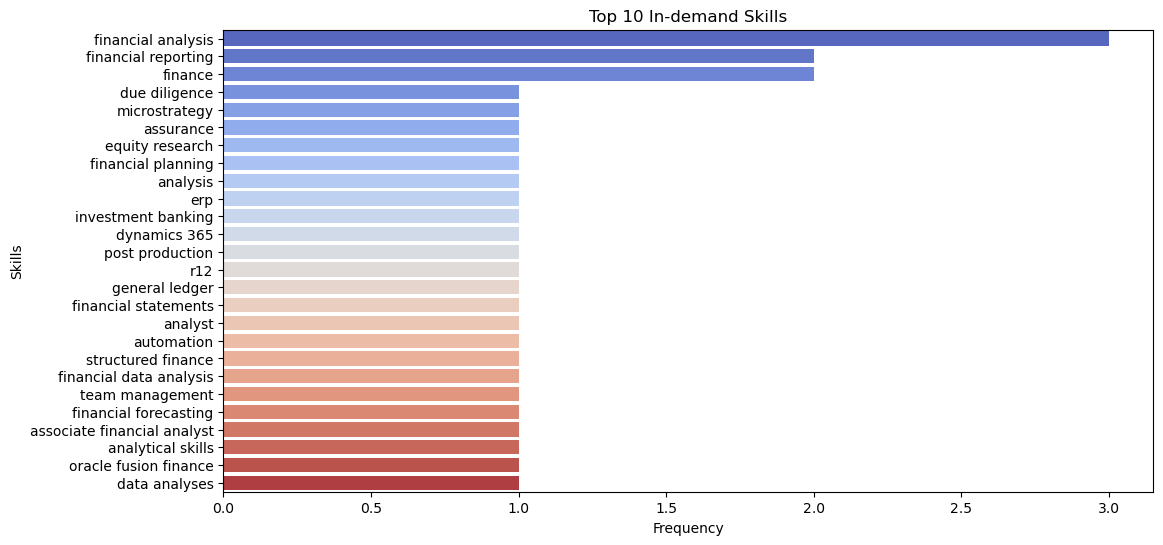

In [2525]:
# Step 1: Explode the 'Skills' column
data_exploded = data.explode('Skills')

# Step 2: Count the frequency
skill_counts = data_exploded['Skills'].value_counts().reset_index()
skill_counts.columns = ['Skill', 'Count']

# Step 3: Plot the Top 10 Skills
plt.figure(figsize=(12,6))
sns.barplot(x='Count', y='Skill', data=skill_counts, palette='coolwarm')
plt.title('Top 10 In-demand Skills')
plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.show()

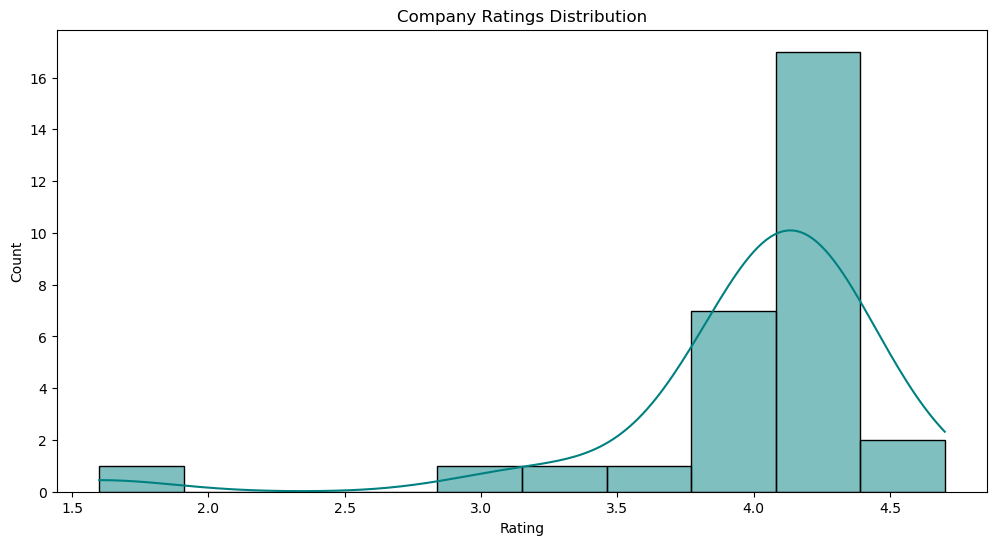

In [2526]:
# Company Ratings Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Ratings'].dropna(), bins=10, kde=True, color='teal')
plt.title("Company Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


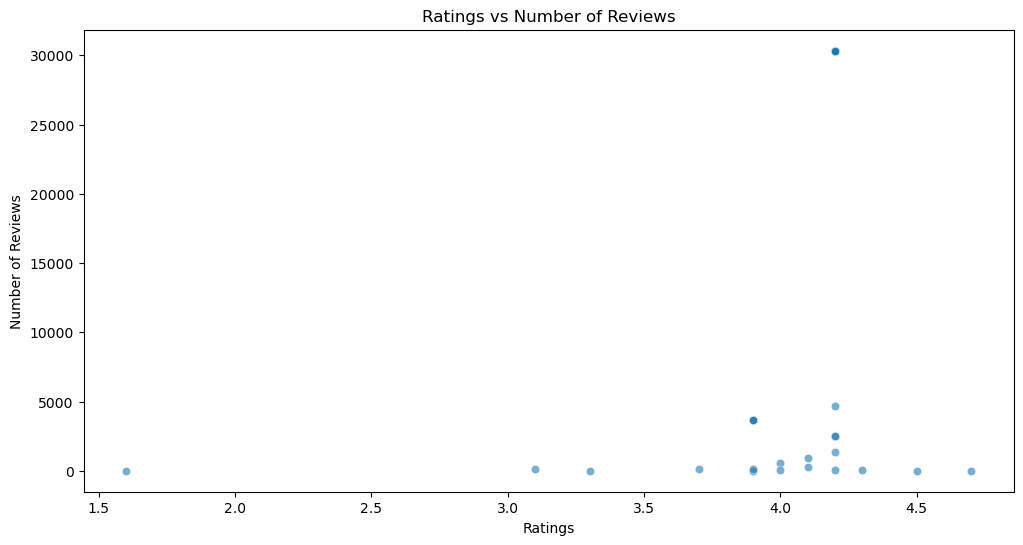

In [2527]:
# Step 1: Work on data itself
data['Reviews_count'] = data['Reviews'].str.extract(r'(\d+)').astype(float)

# Step 2: Plot using data
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Ratings', y='Reviews_count', alpha=0.6)
plt.title("Ratings vs Number of Reviews")
plt.xlabel("Ratings")
plt.ylabel("Number of Reviews")
plt.show()


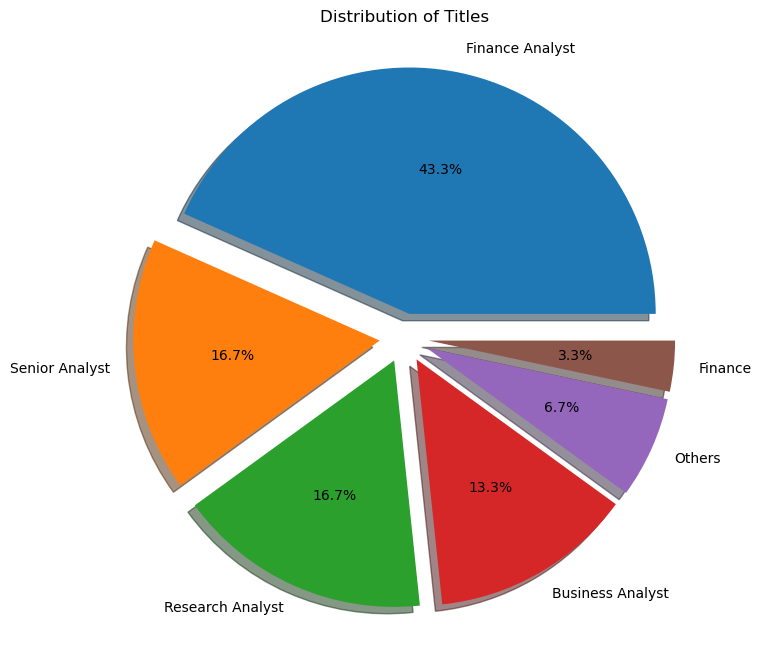

In [2528]:
# Step 1: Count the values
title_counts = data['Title'].value_counts()

# Step 2: Create the explode list (optional, for visual pop-out effect)
explode = [0.1] * len(title_counts)

# Step 3: Now plot
plt.figure(figsize=(8,8))
ax = title_counts.plot(kind='pie', autopct='%1.1f%%', explode=explode, shadow=True)

# Step 5: Show plot
plt.title("Distribution of Titles")
plt.ylabel("")  # Hide y-label
plt.show()


In [2529]:
data.columns

Index(['Company', 'Experience', 'Job_Post_History', 'Location', 'Ratings',
       'Reviews', 'Salary', 'Skills', 'Title', 'URL', 'Reviews_count'],
      dtype='object')

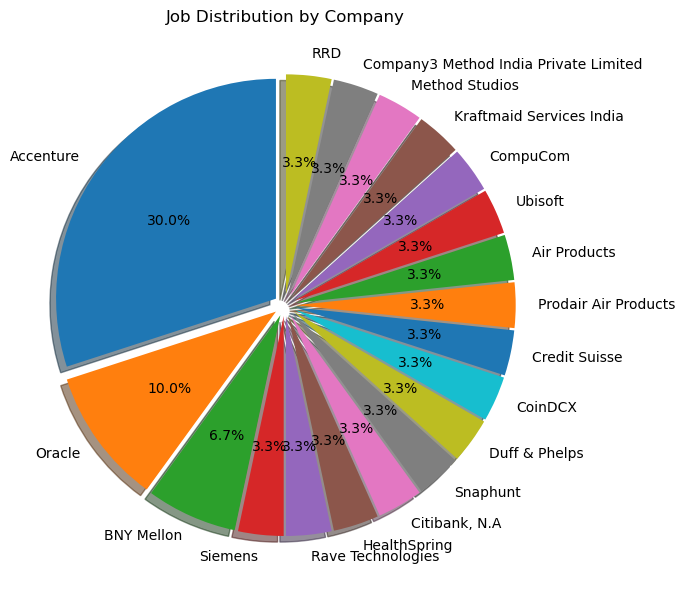

In [2530]:
# Step 1: Count the number of jobs per company
company_counts = data['Company'].value_counts()

# Step 2: Create the explode list
explode = [0.05] * len(company_counts)  # Slight explode for all slices

# Step 3: Now plot it properly
plt.figure(figsize=(12,6))
ax = company_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=explode,
    shadow=True,
    startangle=90
)

# Step 4: Decorate
ax.set_ylabel('')  # Hide y-label
plt.title('Job Distribution by Company')
plt.tight_layout()

plt.show()


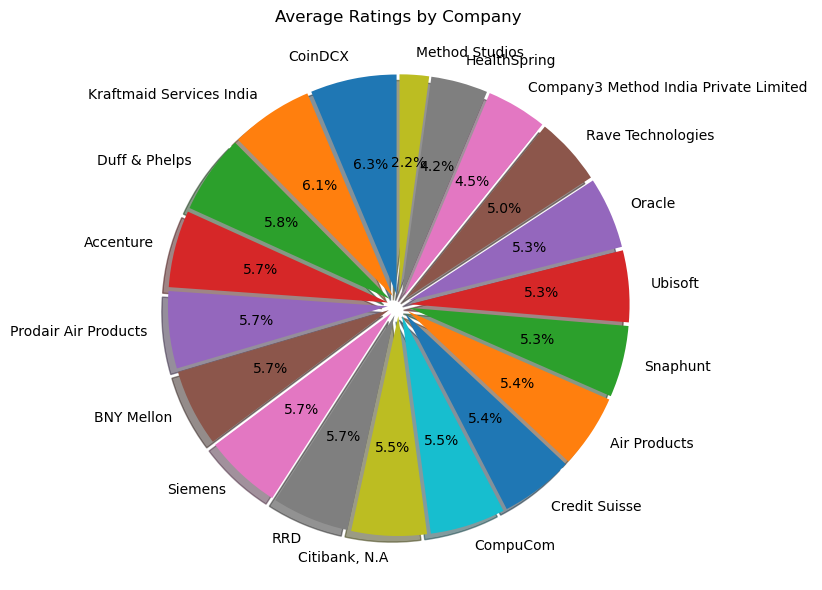

In [2531]:
# Group by 'Company' and take the mean of 'Ratings'
company_ratings = data.groupby('Company')['Ratings'].mean()

# Sort if you want (optional)
company_ratings = company_ratings.sort_values(ascending=False)

# Now you can plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
explode = [0.05] * len(company_ratings)
ax = company_ratings.plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=explode,
    shadow=True,
    startangle=90
)

ax.set_ylabel('')
plt.title('Average Ratings by Company')
plt.tight_layout()
plt.show()


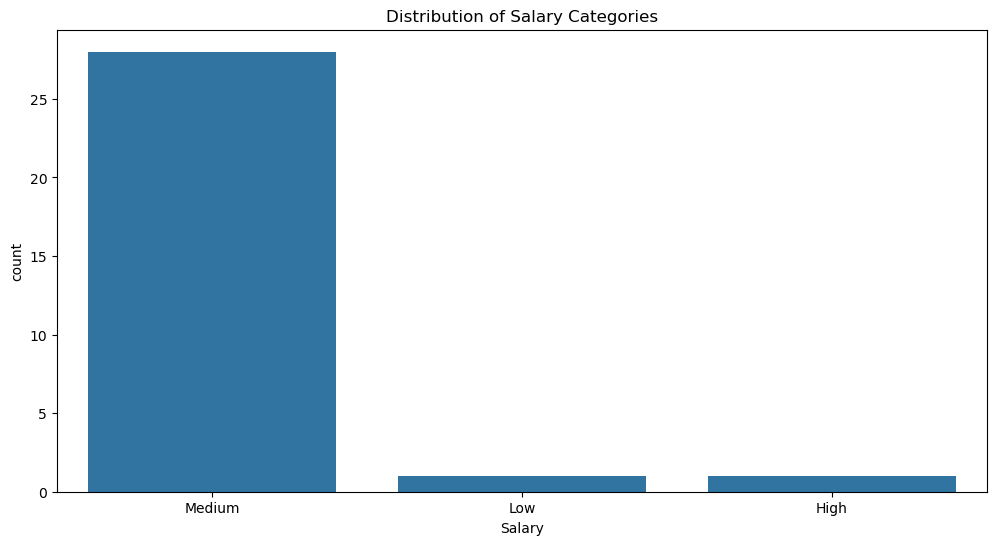

In [2532]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Salary', data=data)
plt.title('Distribution of Salary Categories')
plt.show()


## Bivariate Analysis

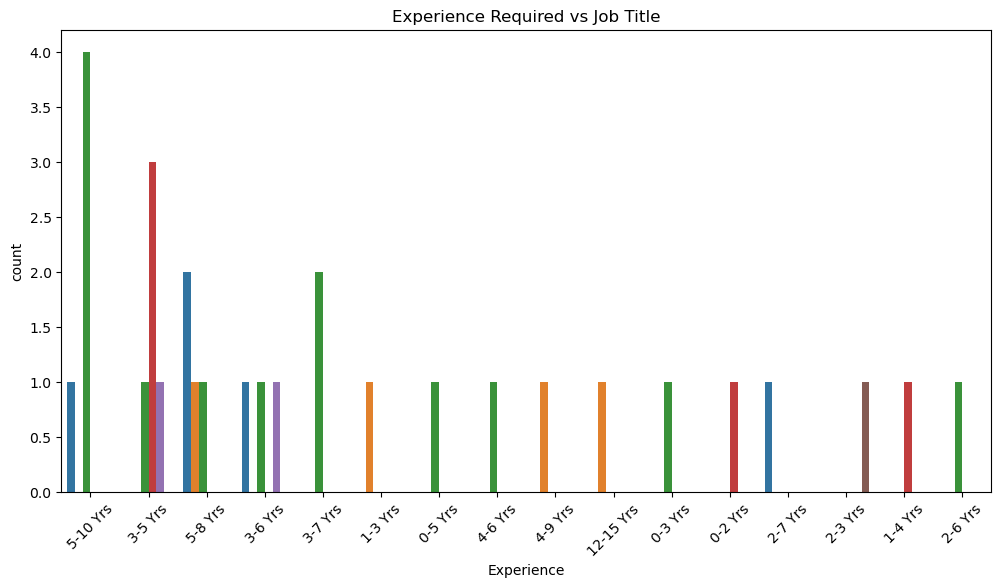

In [2534]:
# Experience vs Job Title 

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Experience', order=data['Experience'].value_counts().index, hue='Title')
plt.title("Experience Required vs Job Title")
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Optional: hide legend if too many titles
plt.show()


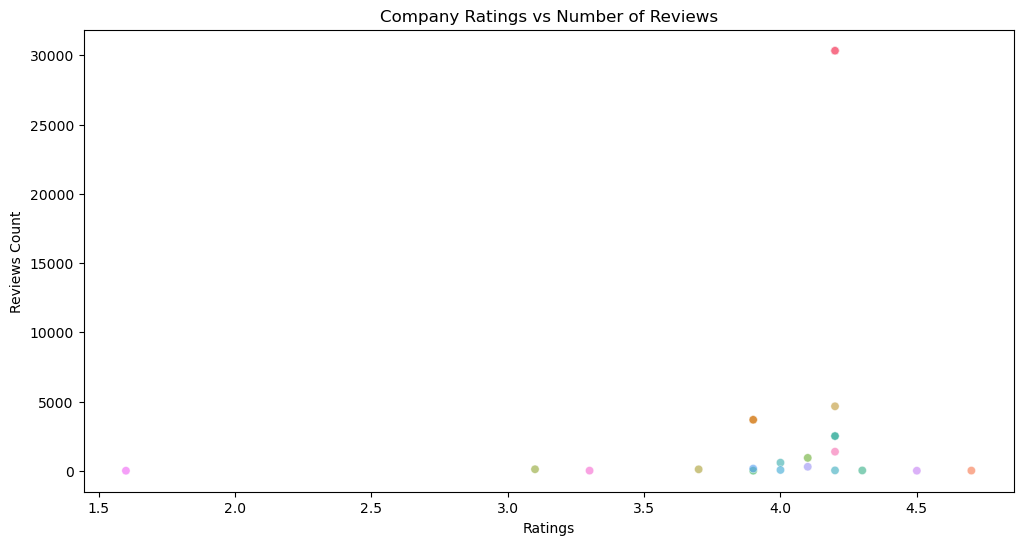

In [2535]:
# Company Ratings vs Number of Reviews
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Ratings', y='Reviews_count', hue='Company', alpha=0.6, legend=False)
plt.title("Company Ratings vs Number of Reviews")
plt.xlabel("Ratings")
plt.ylabel("Reviews Count")
plt.show()


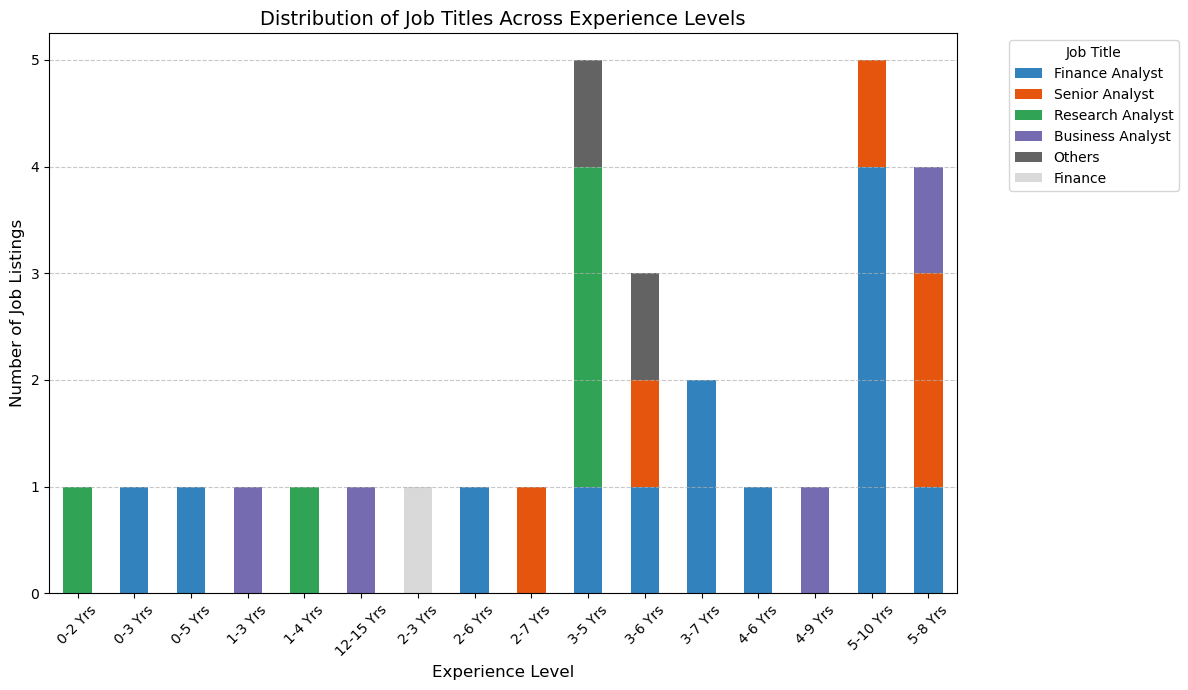

In [2536]:
# Group and pivot: Experience vs Title

exp_title_df = data.groupby('Experience')['Title'].value_counts().unstack().fillna(0)

# Keep only top N job titles for clarity (optional)
top_titles = data['Title'].value_counts().head(6).index  # choose top 6 for clean view
exp_title_df = exp_title_df[top_titles]

# Plot
ax = exp_title_df.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20c')

# Formatting
plt.title("Distribution of Job Titles Across Experience Levels", fontsize=14)
plt.xlabel("Experience Level", fontsize=12)
plt.ylabel("Number of Job Listings", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Job Title", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [2537]:
heatmap_data = data[data['Title'].isin(top_titles)].groupby(['Experience', 'Title']).size().unstack().fillna(0)
heatmap_data.head()

Title,Business Analyst,Finance,Finance Analyst,Others,Research Analyst,Senior Analyst
Experience,,,,,,
0-2 Yrs,0.0,0.0,0.0,0.0,1.0,0.0
0-3 Yrs,0.0,0.0,1.0,0.0,0.0,0.0
0-5 Yrs,0.0,0.0,1.0,0.0,0.0,0.0
1-3 Yrs,1.0,0.0,0.0,0.0,0.0,0.0
1-4 Yrs,0.0,0.0,0.0,0.0,1.0,0.0


## Company categorization(by industry, size, salary, etc.)

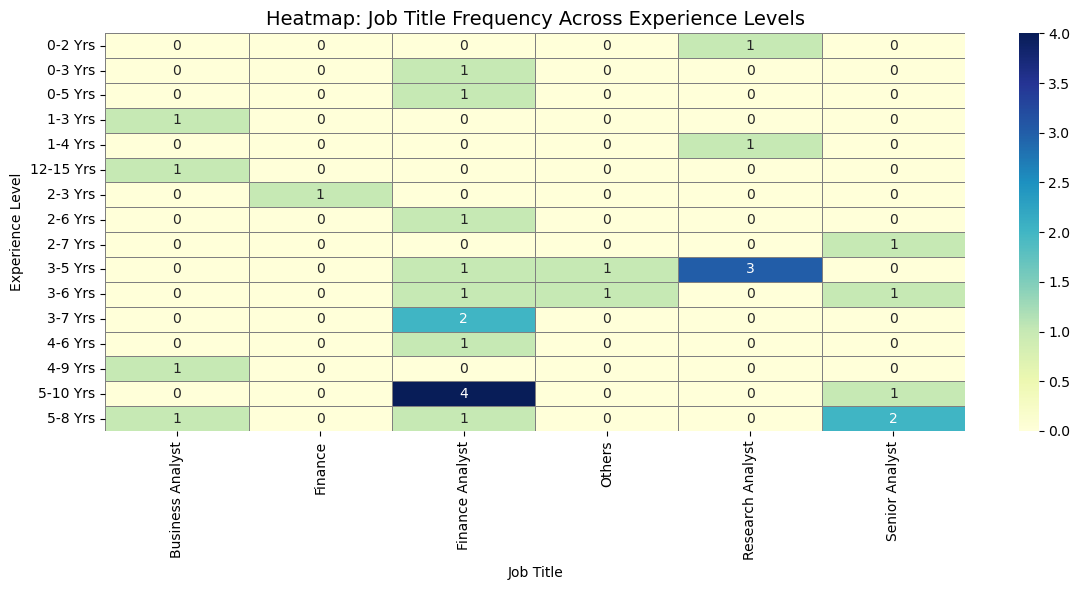

In [2539]:
# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5, linecolor='gray')

# Formatting
plt.title("Heatmap: Job Title Frequency Across Experience Levels", fontsize=14)
plt.xlabel("Job Title")
plt.ylabel("Experience Level")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [2540]:
# Remove Reviews column

data.drop(columns=['Reviews'], inplace=True)

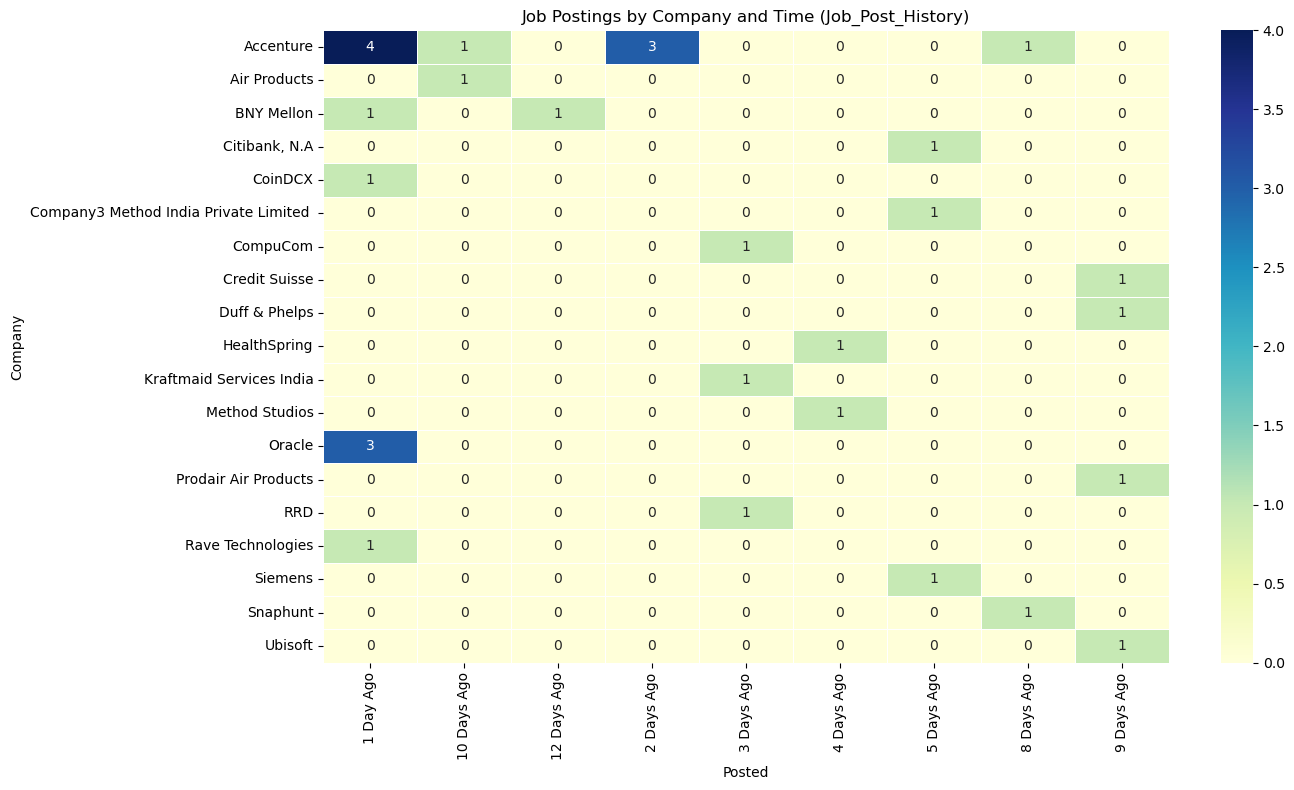

In [2541]:
# Pivot table: number of job postings per company by job post history
pivot = pd.crosstab(data['Company'], data['Job_Post_History'])

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)

# Titles and formatting
plt.title("Job Postings by Company and Time (Job_Post_History)")
plt.xlabel("Posted")
plt.ylabel("Company")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


In [2542]:
# First, make sure Skills is not null
df_sunburst = data[['Location', 'Skills']].dropna()

# If 'Skills' is a list, explode it
if isinstance(df_sunburst['Skills'].iloc[0], list):
    df_sunburst = df_sunburst.explode('Skills')

# Now plot sunburst
import plotly.express as px

fig = px.sunburst(
    df_sunburst,
    path=['Location', 'Skills'],
    title='Location → Skills Sunburst',
    width=800,
    height=800
)
fig.show()


## Model Building 

In [2544]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [2545]:
data.columns

Index(['Company', 'Experience', 'Job_Post_History', 'Location', 'Ratings',
       'Salary', 'Skills', 'Title', 'URL', 'Reviews_count'],
      dtype='object')

In [2546]:
#  Fix list columns: join lists into single string

for column in data.columns:
    if data[column].apply(lambda x: isinstance(x, list)).any():
        data[column] = data[column].apply(lambda x: ','.join(x) if isinstance(x, list) else x)


In [2547]:
# Encode all categorical (object) columns

label_encoders = {}
for column in data.columns:
    if data[column].dtype == "object":
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [2548]:
X = data.drop('Title', axis=1)  
y = data['Title']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.77, random_state=5)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=100),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

Model: Logistic Regression
Accuracy: 0.4286
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.50      0.50      0.50         4
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1

    accuracy                           0.43         7
   macro avg       0.20      0.30      0.23         7
weighted avg       0.36      0.43      0.38         7

------------------------------------------------------------
Model: Decision Tree
Accuracy: 0.4286
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.50      0.50      0.50         4
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1

    accuracy                           0.4

In [2549]:
#  Summary
print("\nSummary of model accuracies:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")


Summary of model accuracies:
Logistic Regression: 0.4286
Decision Tree: 0.4286
Random Forest: 0.7143
SVM: 0.5714
KNN: 0.5714
Gradient Boosting: 0.2857


In [2550]:
# Find the best model
best_model_name = max(results, key=results.get)
best_model_score = results[best_model_name]

In [2551]:
print("\n Best Model:")
print(f"Model Name: {best_model_name}")
print(f"Accuracy: {best_model_score:.4f}")


 Best Model:
Model Name: Random Forest
Accuracy: 0.7143


## Hyperparameter Tuning

In [2553]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for the best model
param_grid = {}

if best_model_name == "Random Forest":
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    best_model = RandomForestClassifier()
    
elif best_model_name == "Gradient Boosting":
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    }
    best_model = GradientBoostingClassifier()

elif best_model_name == "SVM":
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
    best_model = SVC()

elif best_model_name == "Decision Tree":
    param_grid = {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10]
    }
    best_model = DecisionTreeClassifier()

elif best_model_name == "KNN":
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
    best_model = KNeighborsClassifier()

elif best_model_name == "Logistic Regression":
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
    best_model = LogisticRegression(max_iter=1000)

# Apply GridSearchCV
grid_search = GridSearchCV(best_model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("\n Best Parameters after Tuning:")
print(grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits

 Best Parameters after Tuning:
{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}


In [2554]:
# Evaluate the tuned model
tuned_model = grid_search.best_estimator_
y_pred = tuned_model.predict(X_test)
tuned_acc = accuracy_score(y_test, y_pred)

print("\n Accuracy after Hyperparameter Tuning:", tuned_acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


 Accuracy after Hyperparameter Tuning: 0.5714285714285714

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.67      1.00      0.80         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.57         7
   macro avg       0.13      0.20      0.16         7
weighted avg       0.38      0.57      0.46         7



In [2555]:
# Save the dataset to a new CSV file
data.to_csv('naukri_updated_output.csv', index=False)
print("\nData has been saved successfully to 'naukri_updated_output.csv'")



Data has been saved successfully to 'naukri_updated_output.csv'


In [2556]:
data .columns

Index(['Company', 'Experience', 'Job_Post_History', 'Location', 'Ratings',
       'Salary', 'Skills', 'Title', 'URL', 'Reviews_count'],
      dtype='object')

## Model deployment

In [2558]:
import pickle
file = 'Naukri_job.pkl'

In [2559]:
pickle.dump(best_model_name,open(file,'wb'))    